# .............................. Heart Disease Prediction Model Building ...........................

# 

## ............................................................. Data Loading ..............................................................

### Importing Basic Libraries 

In [1]:
# Basic Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

# Machine Learning Models building Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


### Reading CSV file

In [2]:
# give the path of dataset file
rohan_df = pd.read_csv("C:\\Users\\admin\\Desktop\\heart.csv")           

In [3]:
rohan_df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
rohan_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Checking Null Values 

In [5]:
rohan_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# To get entire Information about null values and Data Types 
rohan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## ................................................. Data Visualization and Analysis ..............................................

### Heatmap

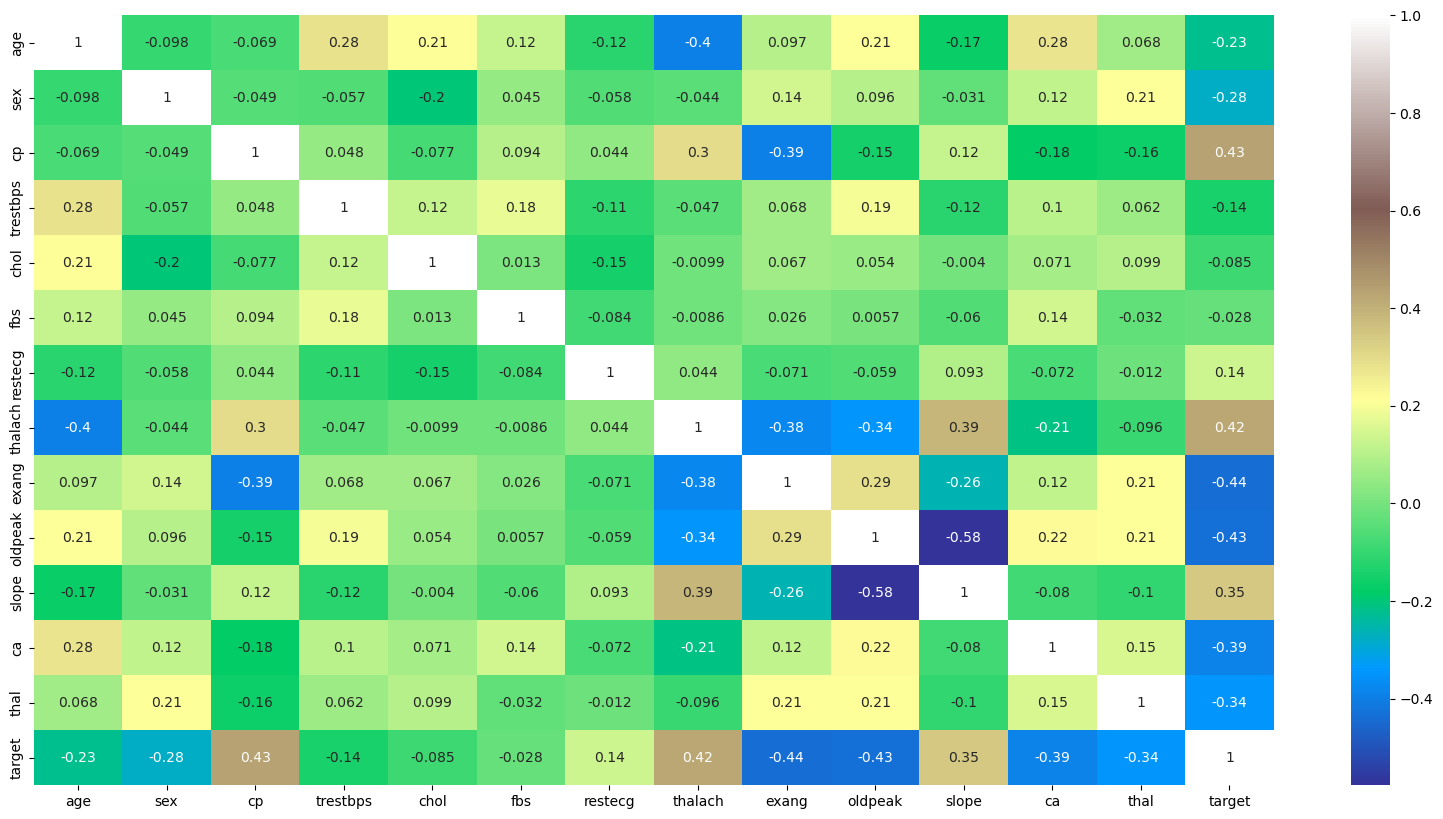

In [7]:
# Heatmap used for Finding Correlation Among Attributes
plt.figure(figsize=(20,10))
sns.heatmap(rohan_df.corr() , annot = True , cmap = "terrain")
plt.show()

### Pair Plot

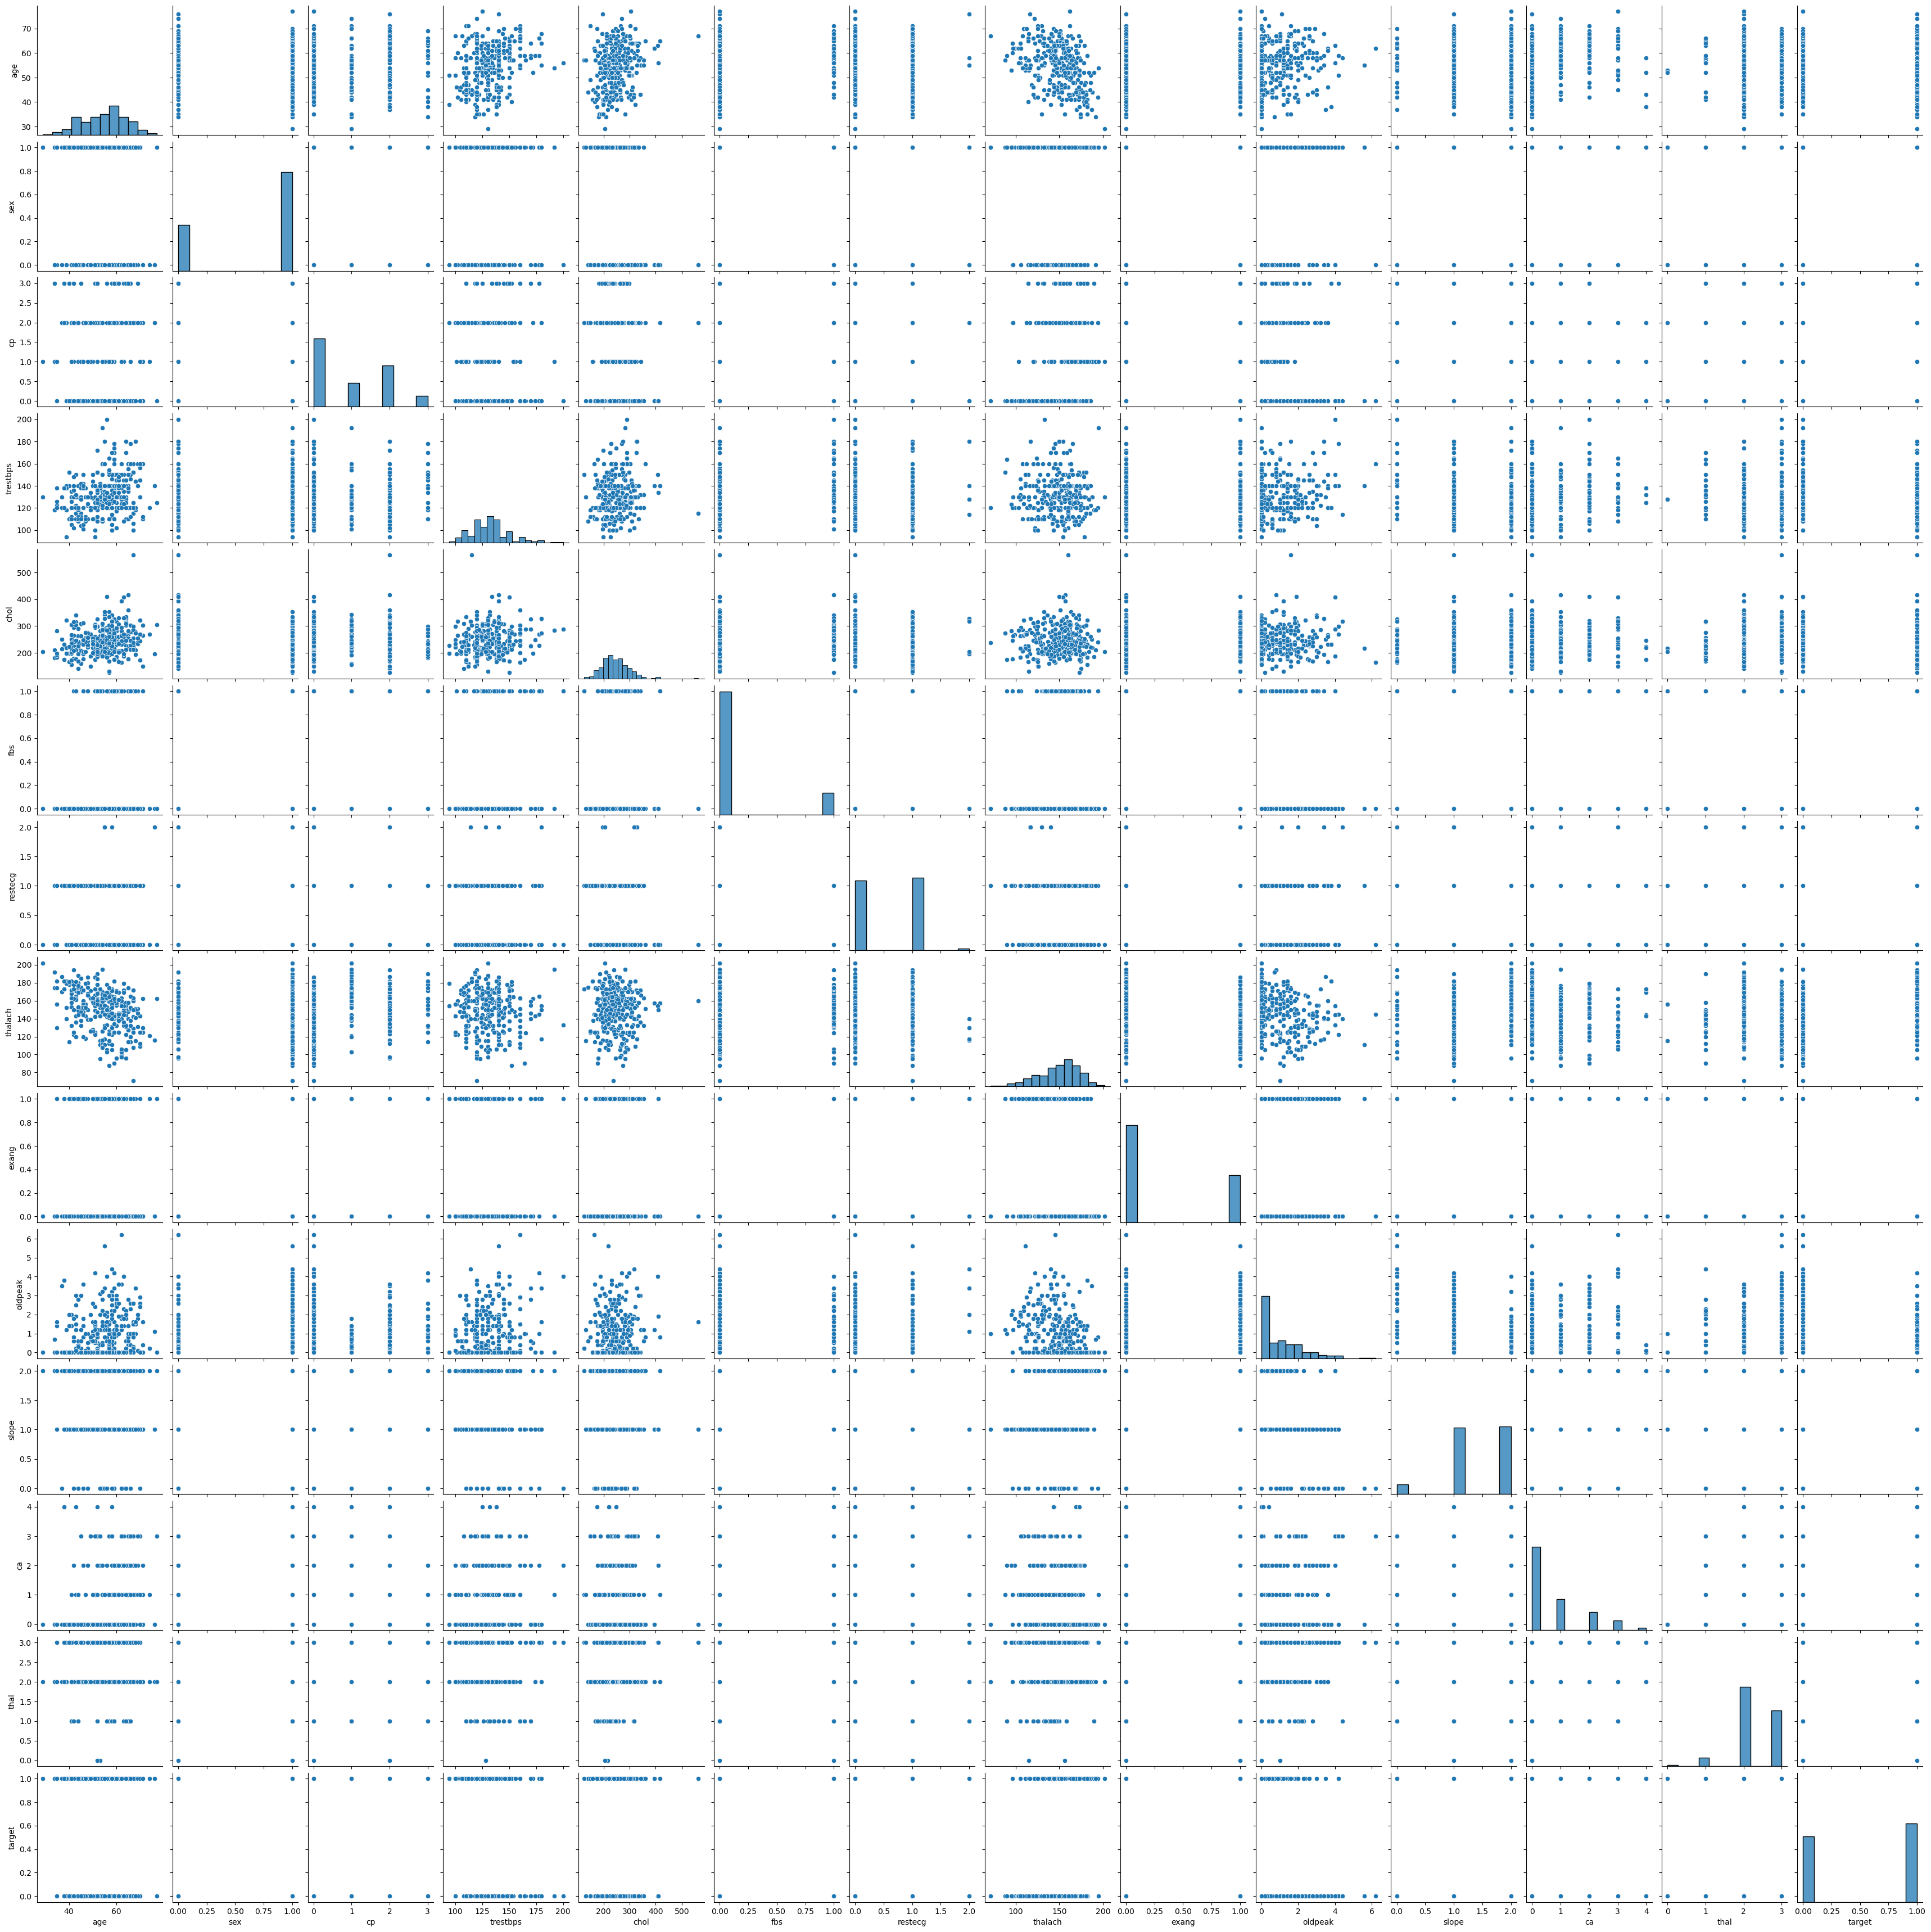

In [8]:
# pair plot used for to visualize the relationship between different features and figure out any linear relation between them
sns.pairplot( data = rohan_df)
plt.show()

### Histogram

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

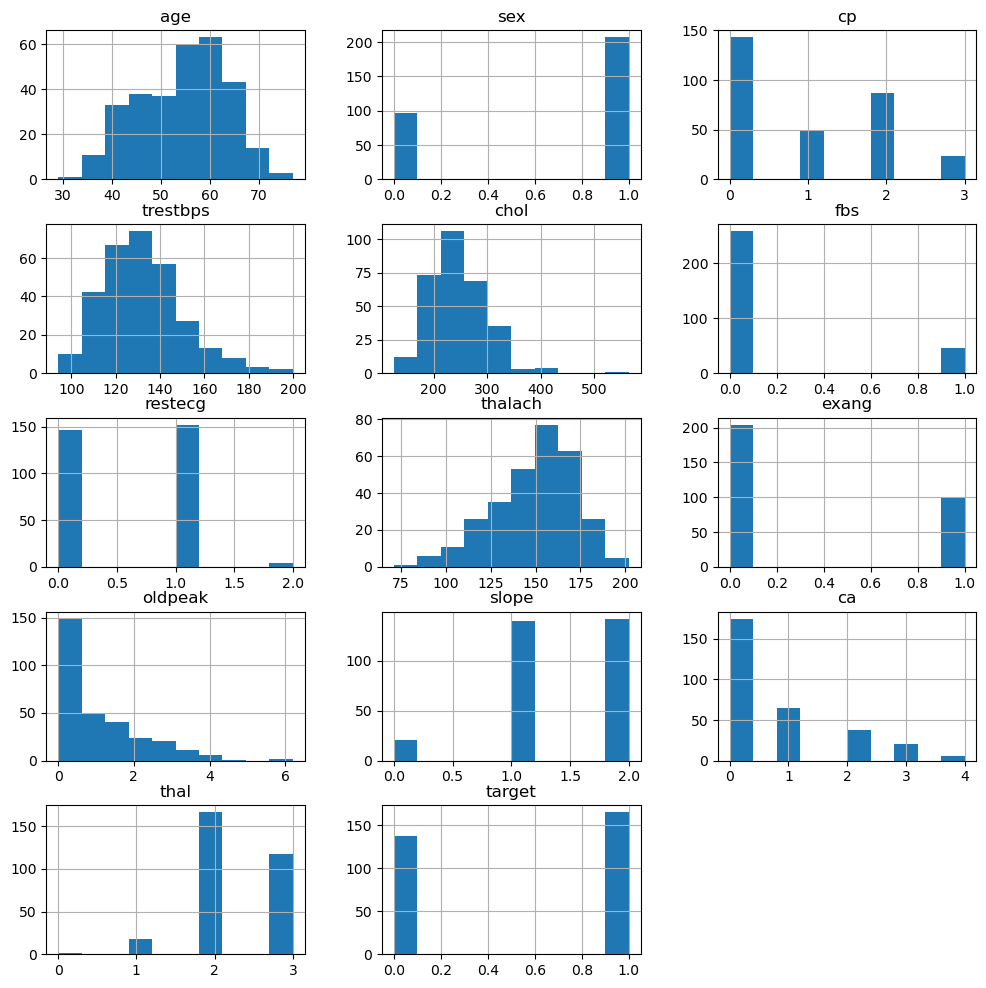

In [9]:
# Histogram used for we can see shape of each feature and provides the count of number of observations in each bin.
rohan_df.hist(figsize = (12,12) , layout =(5,3))

### Box and Whisker Plot

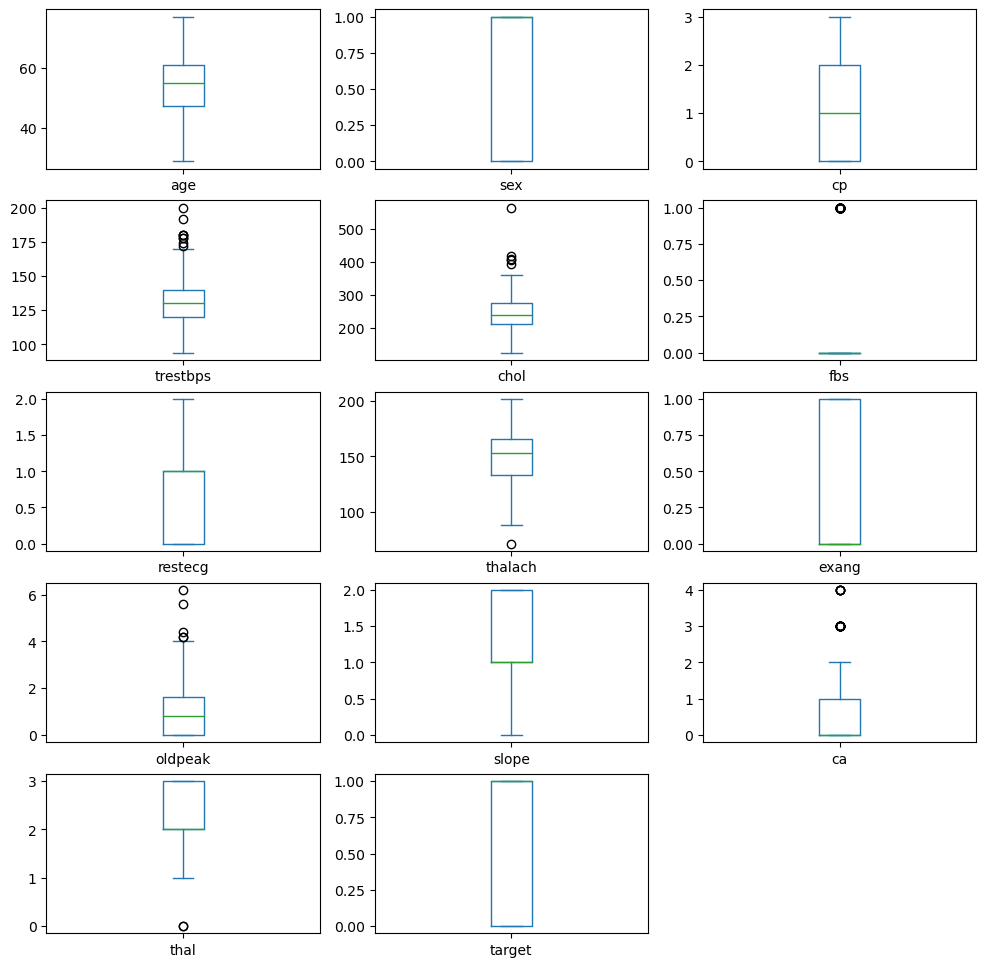

In [10]:
# Box and Whiskers Plot used for to find out outliers in dataset . 
rohan_df.plot( kind = "box" , subplots = True , layout = (5,3) , figsize = (12,12))
plt.show ()

## Visualize the features and their relation with the target                                                               ( Heart Disease or No Heart Disease )

### cat plot 

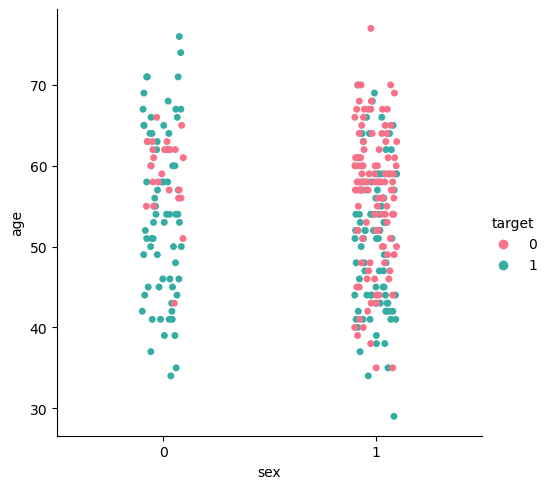

In [11]:
# cat plot
sns.catplot( data = rohan_df , x = "sex" , y = "age" , hue = "target" , palette = "husl")
plt.show()

### Bar Plot 

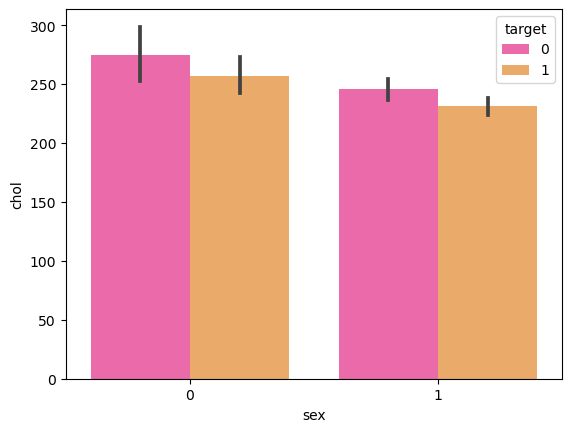

In [12]:
# Bar plot 
sns.barplot( data = rohan_df , x = "sex" , y = "chol" , hue = "target" , palette = "spring")
plt.show()

In [13]:
rohan_df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# Chest Pain Type
rohan_df["cp"].value_counts()        

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

### Count Plot

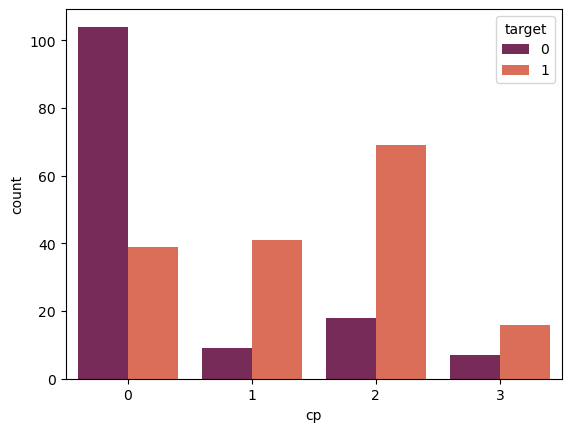

In [15]:
# Count plot
sns.countplot( data = rohan_df , x = "cp" , hue = "target" , palette = "rocket")
plt.show()

### Cross Table for gen

In [16]:
gen = pd.crosstab(rohan_df["sex"] , rohan_df["target"])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


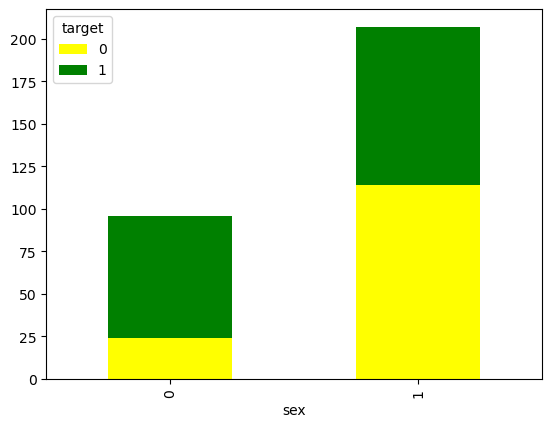

In [17]:
gen.plot(kind = "bar" , stacked = True , color =["yellow" , "green"] , grid = False ) 
plt.show()

### Cross Table  for Chest Pain

In [18]:
chest_pain = pd.crosstab(rohan_df["cp"] , rohan_df["target"])
print(chest_pain)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


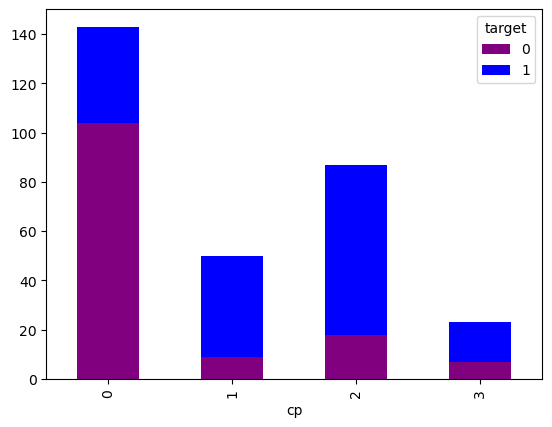

In [19]:
chest_pain.plot( kind = "bar" , stacked = True , color = ["purple" , "blue"] , grid = False )
plt.show()

## ............................................... Preparing the Data for Model .....................................................

### Scaling The Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
column_to_scale = [ "age" , "trestbps" , "chol" , "thalach" , "oldpeak"]
rohan_df[column_to_scale] = StandardScaler.fit_transform(rohan_df[column_to_scale])


In [21]:
# After the Scaling Data
rohan_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


###  Preparing Our Data For Training 

In [22]:
# Preparing Our Data For Training 
X = rohan_df.drop(["target"] , axis = 1 )
y = rohan_df["target"]

In [23]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3 , random_state = 40 )

### Check Sample Size

In [24]:
print("X_train :", X_train.size)
print("X_test :", X_test.size)
print("y_train :" ,y_train.size)
print("y_test :", y_test.size)

X_train : 2756
X_test : 1183
y_train : 212
y_test : 91


### Applying  Machine Learning Algorithm : Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

model1 = lr.fit(X_train , y_train)
Prediction1 = model1.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , Prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

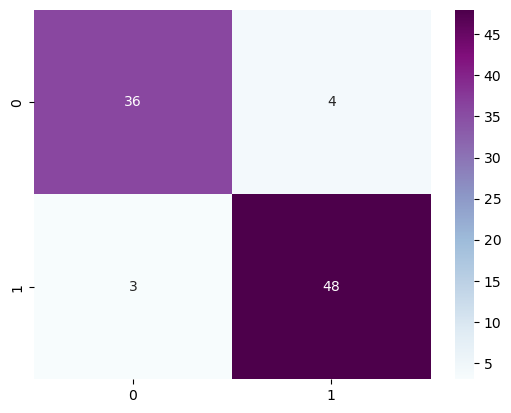

In [27]:
sns.heatmap(cm , annot = True , cmap = "BuPu")
plt.show()

### finding the accuracy of the model

In [28]:
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print("Testing Accurancy :" , (TP+TN)/(TP+TN+FN+FP))

Testing Accurancy : 0.9230769230769231


In [29]:
from sklearn.metrics import accuracy_score

print( "Testing Accurancy :" , accuracy_score(y_test , Prediction1))

Testing Accurancy : 0.9230769230769231


### precision and recall of the model

In [30]:
from sklearn.metrics import classification_report
print( classification_report(y_test , Prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



### Machine Learning Algorithm : KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
model2=KNN.fit(X_train,y_train)
Prediction2 = model2.predict(X_test)


from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Prediction2))

Accuracy Score: 0.8571428571428571


### Machine Learning Algorithm : SVC

In [32]:
from sklearn.svm import SVC
SVC = SVC()
model3 = SVC.fit(X_train,y_train)
Prediction3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Prediction3))

Accuracy Score: 0.9010989010989011


### Machine Learning Algorithm : DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
model4 = DT.fit(X_train,y_train)
Prediction4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Prediction4))

Accuracy Score: 0.7032967032967034


###  Machine Learning Algorithm : GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model5 = GNB.fit(X_train,y_train)
Prediction5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Prediction5))

Accuracy Score: 0.8791208791208791


###  Machine Learning Algorithm : RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
model6 = RF.fit(X_train, y_train)
Prediction6  = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Prediction6))

Accuracy Score: 0.8791208791208791


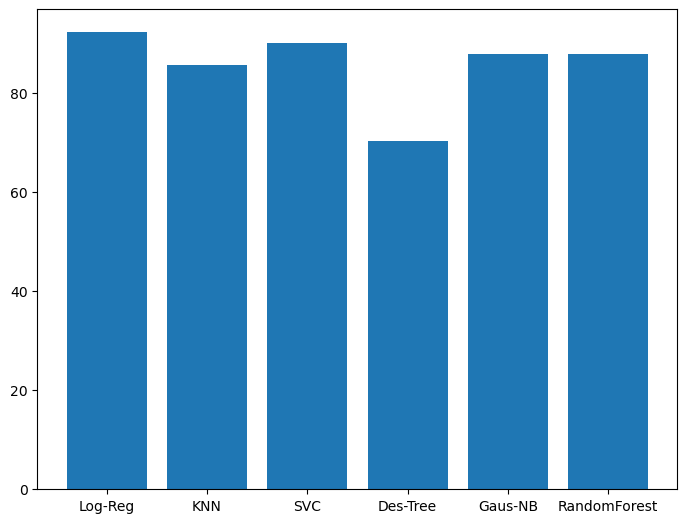

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Log-Reg', 'KNN', 'SVC', 'Des-Tree', 'Gaus-NB', 'RandomForest']
students = [92.30,85.71,90.10, 70.32 ,87.91,87.91]
ax.bar(langs,students)
plt.show()

## The Best Accuracy is given by Logistic Regression is 92 . Hence we will use LogisticRegression algorithms for training my model.

## --------------------------------------------------------------------------------------------------------------------------